# Teil 3: Klassifikation von Bürgeranfragen

In diesem Notebook trainieren wir ein Machine Learning Modell, das die Kategorie einer Bürgeranfrage automatisch vorhersagen kann.

In [ ]:
# Daten vorbereiten, TF-IDF-Vektorisierung und Aufteilen in Trainings-/Testdaten

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# CSV laden
df = pd.read_csv("../data/raw/buergeranfragen_sample.csv", sep=";")

# Textvorverarbeitung
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

texts_clean = df["anfrage"].apply(clean_text)
labels = df["kategorie"]

# TF-IDF-Vektorisierung
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_clean)
y = labels

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Modell importieren & trainieren
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modell initialisieren und trainieren
model = MultinomialNB()
model.fit(X_train, y_train)

# Vorhersage
y_pred = model.predict(X_test)

In [4]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred))

Accuracy: 0.08333333333333333

Klassifikationsbericht:
               precision    recall  f1-score   support

       Abfall       0.50      0.50      0.50         2
          Bau       0.00      0.00      0.00         3
    Dokumente       0.00      0.00      0.00         2
Infrastruktur       0.00      0.00      0.00         0
    Sonstiges       0.00      0.00      0.00         3
      Verkehr       0.00      0.00      0.00         2

     accuracy                           0.08        12
    macro avg       0.08      0.08      0.08        12
 weighted avg       0.08      0.08      0.08        12



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

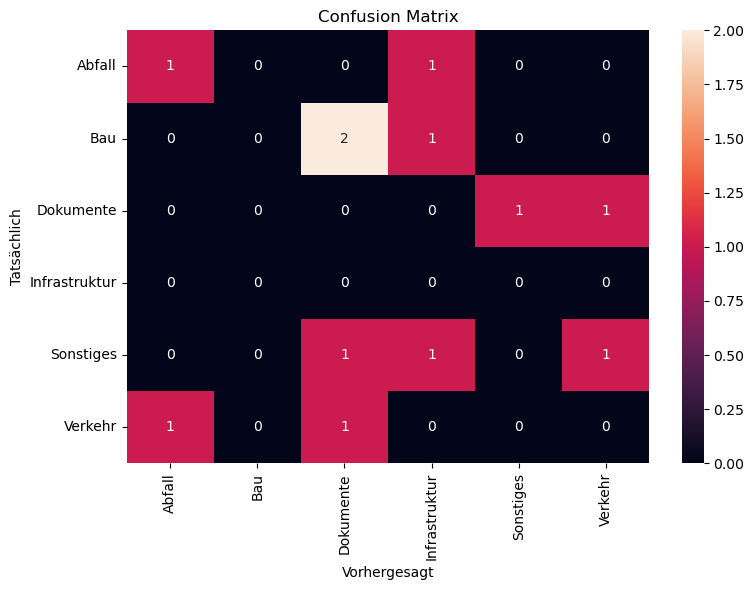

In [5]:
# Confusion Matrix visualisieren
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [6]:
# Ein paar Beispielvorhersagen anzeigen
import pandas as pd

# Beispielhafte Vorhersagen anzeigen
results = pd.DataFrame({
    "Anfrage": X_test[:10].toarray().tolist(),  # Optional: ersetzen mit Text-Backup
    "Tatsächlich": y_test[:10].values,
    "Vorhergesagt": y_pred[:10]
})

print(results)

                                             Anfrage Tatsächlich  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      Abfall   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      Abfall   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     Verkehr   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         Bau   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   Dokumente   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   Sonstiges   
6  [0.0, 0.48527157829951195, 0.0, 0.0, 0.0, 0.0,...     Verkehr   
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         Bau   
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   Dokumente   
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   Sonstiges   

    Vorhergesagt  
0         Abfall  
1  Infrastruktur  
2      Dokumente  
3  Infrastruktur  
4      Sonstiges  
5      Dokumente  
6         Abfall  
7      Dokumente  
8        Verkehr  
9        Verkehr  
